# Reduced Order Models

## Preliminaries

In [1]:
import sys
sys.path.insert(0, "/home/ubuntu/symmathSBML")
import control as c
from controlSBML.control_sbml import ControlSBML
import controlSBML.constants as cn
try:
    from symmathSBML.symmath_sbml import SymmathSBML
except:
    pass

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tellurium as te

import os
import urllib.request

In [2]:
MODELS = ["LINEAR_MDL", "NONLINEAR1_MDL", "NONLINEAR2_MDL"]

## Antimony Models

Here we present 3 variations of a sequential pathway.
* LINEAR_MDL: The kinetics result in a linear system of ODEs
* NONLINEAR1_MDL: There is one quadratic rate law, affecting $S_2$, $S_3$
* NONLINEAR2_MDL: There are two quadratic rate laws, affecting $S_1$, $S_2$,$S_3$.

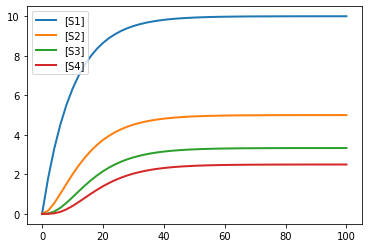

In [3]:
# Need to write the model in the correct way so that get a Jacobian with all state.
# In particular, cannot use fixed concentrations. Instead, generate the species at the same rate at which it is consumed.
LINEAR_MDL = """
J0: $S0 -> S1; $S0
J1: S1 -> S2; k1*S1
J2: S2 -> S3; k2*S2
J3: S3 -> S4; k3*S3
J4: S4 -> $S5; k4*S4

k1 = 0.1
k2 = 0.2
k3 = 0.3
k4 = 0.4
S0 = 1
S1 = 0
S2 = 0
S3 = 0
S4 = 0
S5 = 0
"""
LINEAR_RR = te.loada(LINEAR_MDL)
LINEAR_RR.plot(LINEAR_RR.simulate(0, 100))

In [4]:
# Need to write the model in the correct way so that get a Jacobian with all state.
# In particular, cannot use fixed concentrations. Instead, generate the species at the same rate at which it is consumed.
NONLINEAR1_MDL = """
J0: $S0 -> S1; $S0
J1: S1 -> S2; k2*S1
J2: S2 -> S3; k3*S2*S1
J3: S3 -> S4; k3*S3
J4: S4 -> $S5; k4*S4


k1 = 1;
k2 = 1
k3 = 1
k4 = 1
S0 = 1
k0 = 1
S1 = 10
S2 = 0
S3 = 0
"""
NONLINEAR1_RR = te.loada(NONLINEAR1_MDL)
#NONLINEAR1_RR.plot(NONLINEAR1_RR.simulate())

In [5]:
NONLINEAR1_RR.reset()
NONLINEAR1_RR.getFullJacobian()

      S1,  S2, S3, S4
S1 [[ -1,   0,  0,  0],
S2  [  1, -10,  0,  0],
S3  [  0,  10, -1,  0],
S4  [  0,   0,  1, -1]]

In [6]:
ctlsb = ControlSBML(NONLINEAR1_MDL)
ctlsb.jacobian_df

,S1,S2,S3,S4
S1,-1.0,0.0,0.0,0.0
S2,1.0,-10.0,0.0,0.0
S3,0.0,10.0,-1.0,0.0
S4,0.0,0.0,1.0,-1.0


In [7]:
ctlsb = ControlSBML(NONLINEAR1_MDL)
ctlsb.jacobian_df

,S1,S2,S3,S4
S1,-1.0,0.0,0.0,0.0
S2,1.0,-10.0,0.0,0.0
S3,0.0,10.0,-1.0,0.0
S4,0.0,0.0,1.0,-1.0


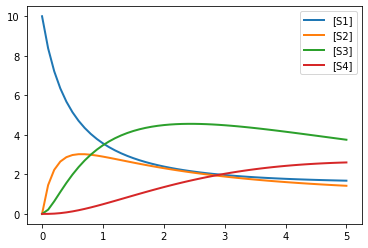

In [8]:
# Need to write the model in the correct way so that get a Jacobian with all state.
# In particular, cannot use fixed concentrations. Instead, generate the species at the same rate at which it is consumed.
NONLINEAR2_MDL = """
J0: $S0 -> S1; $S0
J1: S1 -> S2; k2*S1*S1
J2: S2 -> S3; k3*S2*S1
J3: S3 -> S4; k3*S3
J4: S4 -> $S5; k4*S4


k1 = 0.1
k2 = 0.2
k3 = 0.3
k4 = 0.4
S0 = 0.5
k0 = 1
S1 = 10
S2 = 0
S3 = 0
"""
NONLINEAR2_RR = te.loada(NONLINEAR2_MDL)
NONLINEAR2_RR.plot(NONLINEAR2_RR.simulate())

# Helper Functions

In [9]:
def getSharedCodes(module_name="util"):
    """
    Obtains common codes from the github repository.

    Parameters
    ----------
    module_name: str
        name of the python module in the src directory
    """
    #url = "https://github.com/sys-bio/network-modeling-summer-school-2021/raw/main/src/%s.py" % moduleName
    url = "https://github.com/ModelEngineering/controlSBML/raw/main/controlSBML/%s.py" % module_name
    local_python = "python.py"
    _, _ = urllib.request.urlretrieve(url=url, filename=local_python)
    with open(local_python, "r") as fd:
        codeStr = "".join(fd.readlines())
    print(codeStr)
    exec(codeStr, globals())

# Acquire codes
getSharedCodes()

import numpy as np
import pandas as pd
import urllib.request


REPO_URL =  "https://github.com/ModelEngineering/controlSBML/raw/main"
MODULE_URLPAT =  REPO_URL + "/controlSBML/%s.py"  # Pattern for module URL
MODEL_URLPAT =  REPO_URL + "/models/%s"
MODEL_823_FILE = "biomodels_823.ant"
LOCAL_FILE = "local.txt"


def calculateMatrixDistance(mat1, mat2):
    """
    Calculates the distance between two matrices with the same shape.

    Parameters
    ----------
    mat1 - np.array
    mat2 - np.array
    
    Returns
    -------
    float
    """
    if np.shape(mat1) != np.shape(mat2):
        raise ValueError("Matrices must be the same shape.")
    return np.sum( (mat1 - mat2)**2)

def getSharedCodes(module_name="util"):
    """
    Obtains common codes from the github repository.

    Parameters
    ----------
    module_name: str
        name of the python module in the src directory
    """
    url = "https://github.com/ModelEngineering/controlSBML/raw/main/controlSBML/%s.py" % modul

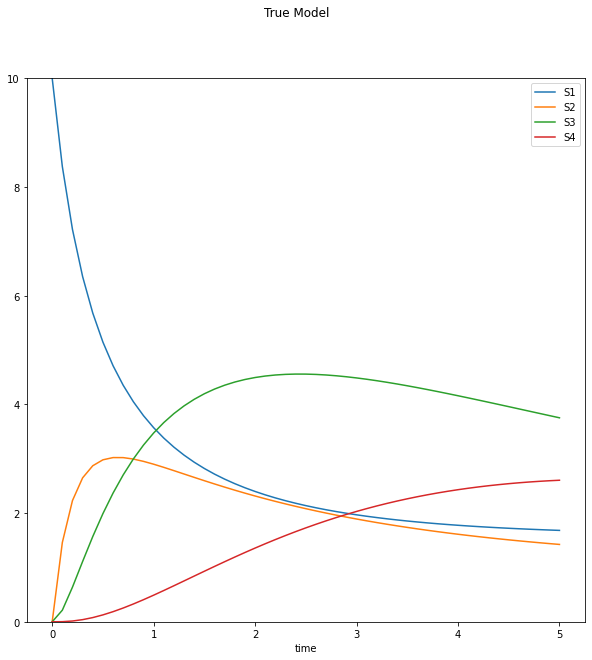

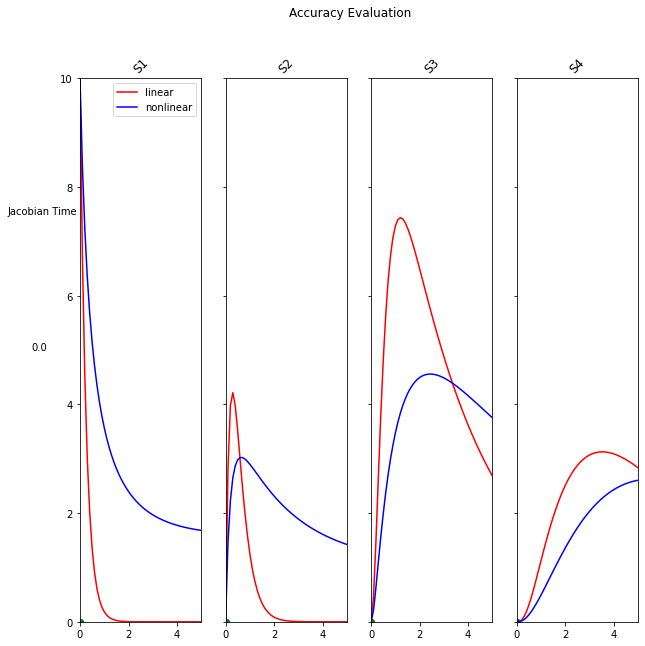

In [10]:
def evaluateModel(model_reference, **kwargs):
    ctlsb = ControlSBML(model_reference)
    ctlsb.plotTrueModel(suptitle="True Model", **kwargs)
    ctlsb.plotAccuracy(suptitle="Accuracy Evaluation", **kwargs)
    return ctlsb

# TESTS
_ = evaluateModel(NONLINEAR2_MDL, is_plot=False)

# Model Reductions

In [11]:
ctlsb = ControlSBML(LINEAR_RR)

## Eigenvalues and eigenvectors of the Jacobian

In [12]:
A = ctlsb.jacobian_df
A_mat = A.values
A

,S1,S2,S3,S4
S1,-0.1,0.0,0.0,0.0
S2,0.1,-0.2,0.0,0.0
S3,0.0,0.2,-0.3,0.0
S4,0.0,0.0,0.3,-0.4


In [13]:
U, S, V = np.linalg.svd(A_mat)

In [14]:
pd.DataFrame(U)

,0,1,2,3
0,0.002667,-0.056903,0.384949,-0.921178
1,-0.077251,0.537056,-0.762646,-0.352099
2,0.481438,-0.715923,-0.481152,-0.155450
3,-0.873065,-0.442479,-0.196667,-0.057380


In [15]:
pd.DataFrame(S)

,0
0,0.547384
1,0.323081
2,0.172660
3,0.078599


In [16]:
pd.DataFrame(V)

,0,1,2,3
0,-0.014600,0.204131,-0.742351,0.637991
1,0.183842,-0.775643,0.253909,0.547823
2,-0.664654,0.326067,0.494298,0.455615
3,0.724033,0.500389,0.374320,0.292015


## Construct the reduced order model

We'll do this by using a new coordinate space.
This coordinate space eliminates the effects of smaller singular values.

We'll transform ${\bf A}$, and $n \times n$ matrix, to reduce the dimension to $m \times m$.
This is done using singular values.
Recall that the SVD  of a matrix is ${\bf A} = {\bf U} {\bf S}  {\bf V}$.
We construct
$\tilde{{\bf A}} = {\bf U} {\tilde {\bf S}} {\bf V}$
where we set to 0 the smaller singular values.

In [17]:
pd.DataFrame(A_mat)

,0,1,2,3
0,-0.1,0.0,0.0,0.0
1,0.1,-0.2,0.0,0.0
2,0.0,0.2,-0.3,0.0
3,0.0,0.0,0.3,-0.4


In [18]:
np.linalg.eig(A_mat)[0]

array([-0.4, -0.3, -0.2, -0.1])

In [19]:
pd.DataFrame(np.linalg.eig(A_mat)[1])

,0,1,2,3
0,0.0,0.000000,0.000000,0.5
1,0.0,0.000000,0.267261,0.5
2,0.0,0.316228,0.534522,0.5
3,1.0,0.948683,0.801784,0.5


In [20]:
def mkReducedOrderModel(A_mat, r):
    """
    Creates a reduced order model of dimension r.
    
    Parameters
    ----------
    A_mat: n X n matrix
    r: int (r < n)
    
    Returns
    -------
    A_tilde_mat: n X n
    """
    U_mat, S, V_mat = np.linalg.svd(A_mat)
    lst = [v if n < r else 0 for n, v in enumerate(S)]
    S_tilde = np.array(lst)
    df = pd.DataFrame(np.matmul(U * S_tilde, V_mat))
    df = df.applymap(lambda v: v if np.abs(v) > 0.0001 else 0)
    return df.values

# Tests
np.allclose(mkReducedOrderModel(A_mat, 5), A_mat)

True

In [21]:
U_mat, S, V_mat = np.linalg.svd(A_mat)
pd.DataFrame(V_mat)

,0,1,2,3
0,-0.014600,0.204131,-0.742351,0.637991
1,0.183842,-0.775643,0.253909,0.547823
2,-0.664654,0.326067,0.494298,0.455615
3,0.724033,0.500389,0.374320,0.292015


In [22]:
S

array([0.54738387, 0.32308133, 0.17266043, 0.07859856])

Note which species are most weighted for each coordinate.

In [23]:
pd.DataFrame(mkReducedOrderModel(A_mat, 6))

,0,1,2,3
0,-0.1,0.0,0.0,0.0
1,0.1,-0.2,0.0,0.0
2,0.0,0.2,-0.3,0.0
3,0.0,0.0,0.3,-0.4


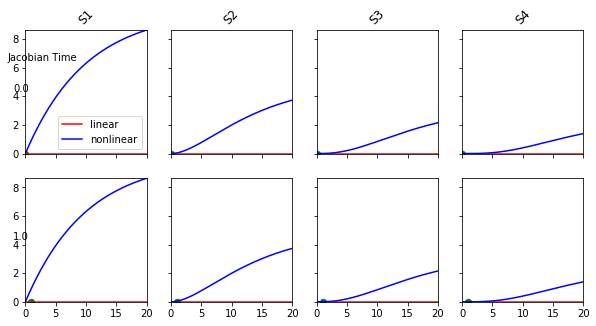

In [24]:
ctlsb.plotAccuracy(timepoints=[0, 1], A_df=A_mat, end_time=20, figsize=(10, 5))

In [25]:
A5_mat = mkReducedOrderModel(A_mat, 5)
pd.DataFrame(A5_mat)

,0,1,2,3
0,-0.1,0.0,0.0,0.0
1,0.1,-0.2,0.0,0.0
2,0.0,0.2,-0.3,0.0
3,0.0,0.0,0.3,-0.4


In [26]:
np.linalg.eig(A5_mat)[0]

array([-0.4, -0.3, -0.2, -0.1])

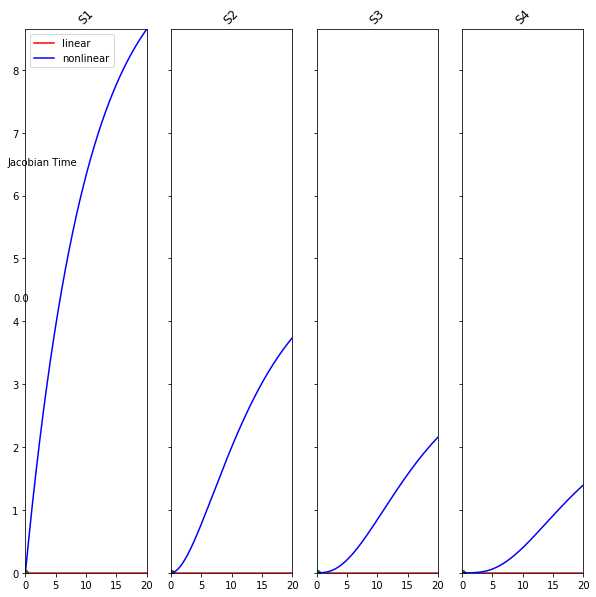

In [27]:
ctlsb.plotAccuracy(A_df=A5_mat, end_time=20)

In [28]:
A3_mat = mkReducedOrderModel(A_mat, 3)
pd.DataFrame(A3_mat)

,0,1,2,3
0,-0.047578,0.036230,0.027102,0.021143
1,0.120037,-0.186152,0.010359,0.008081
2,0.008846,0.206114,-0.295427,0.003568
3,0.003265,0.002257,0.301688,-0.398683


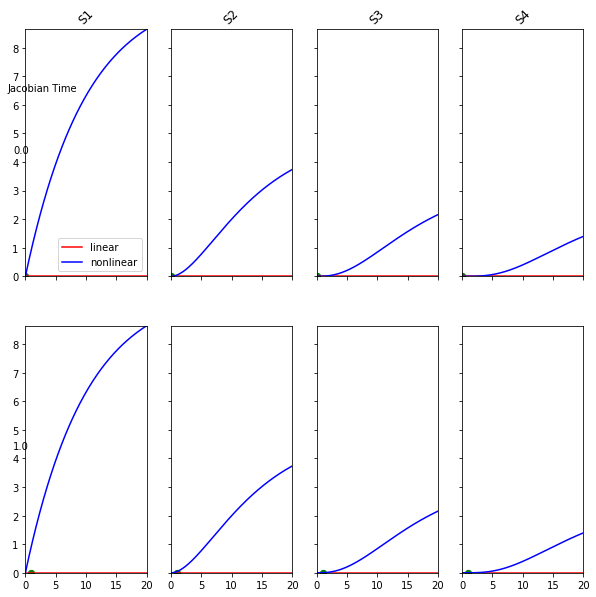

In [29]:
ctlsb.plotAccuracy(timepoints=[0, 1], A_df=A3_mat, end_time=20)

**TO DO**
1. Analyze eigenvalues of the reduced matrix
1. What analysis should be done with reduced order systems?
   1. Analysis in new coordinate space of reduced dimension?
   1. Analyze the transformation vectors?

## Accuracy of Linear Model: Sequential Pathway

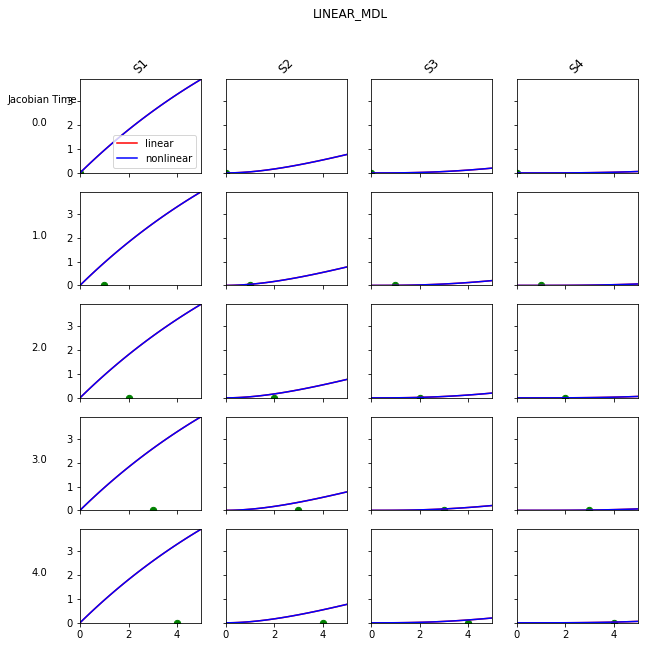

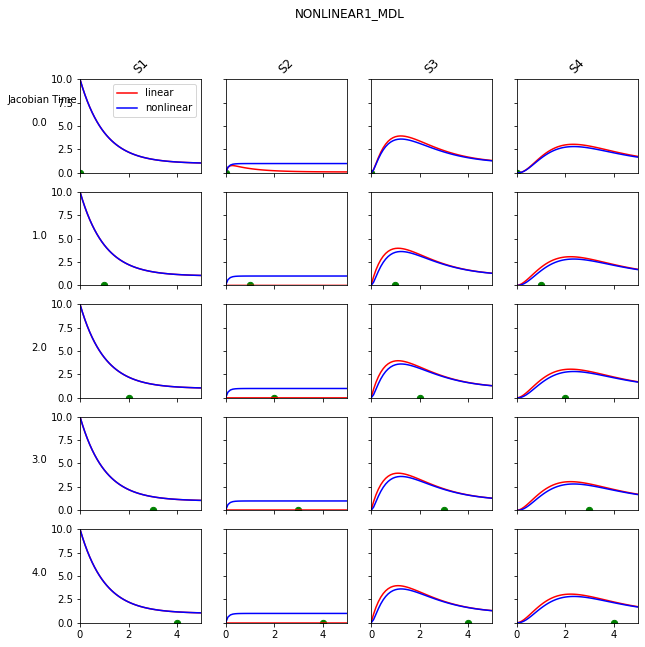

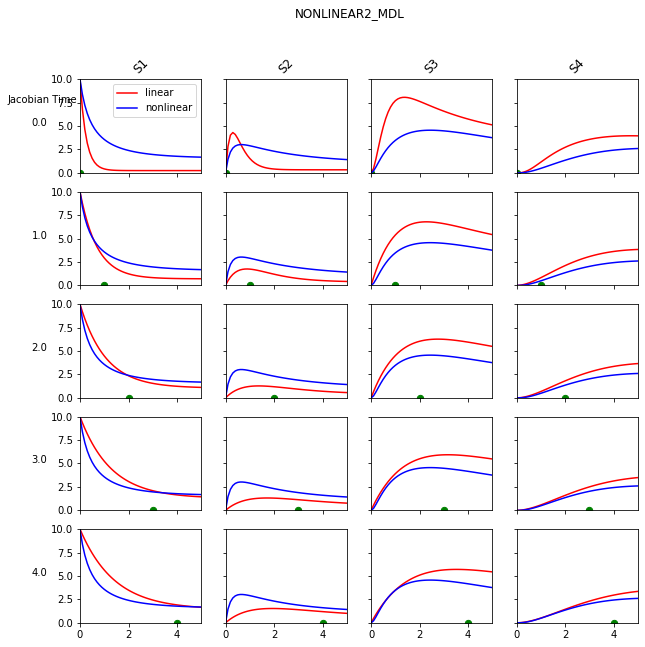

In [30]:
timepoints = range(5)
for name in ["LINEAR_MDL", "NONLINEAR1_MDL", "NONLINEAR2_MDL"]:
    ctlsb = ControlSBML(eval(name), input_names=["J0"])
    ctlsb.plotAccuracy(timepoints=timepoints, suptitle=name, step_val=1)

In [31]:
try:
    symmath = SymmathSBML(NONLINEAR2_MDL)
    symmath.jacobian_df
except:
    pass

**Notes**
1. For S0, the time at which the Jacobian is calculated doesn't matter since $\frac {\partial S_0}{S_n}$ is a constant (0).
1. $S_1$, $S_2$, $S_3$ have non-constant partial derivatives and so their Jacobian will change with the timepoint.

In [32]:
for mdl in MODELS:
    print("\n\n %s" % mdl)
    symmath = SymmathSBML(eval(mdl))
    print(symmath.getJacobian(is_sub_parameters=True, is_sub_others=True, is_sub_species=False))



 LINEAR_MDL
                   S0                  S1                  S2  \
S0  -1.00000000000000                   0                   0   
S1   1.00000000000000  -0.100000000000000                   0   
S2                  0   0.100000000000000  -0.200000000000000   
S3                  0                   0   0.200000000000000   
S4                  0                   0                   0   
S5                  0                   0                   0   

                    S3                  S4 S5  
S0                   0                   0  0  
S1                   0                   0  0  
S2                   0                   0  0  
S3  -0.300000000000000                   0  0  
S4   0.300000000000000  -0.400000000000000  0  
S5                   0   0.400000000000000  0  


 NONLINEAR1_MDL
                   S0                 S1       S2                 S3  \
S0  -1.00000000000000                  0        0                  0   
S1   1.00000000000000  -1.000000

# Wolf Model

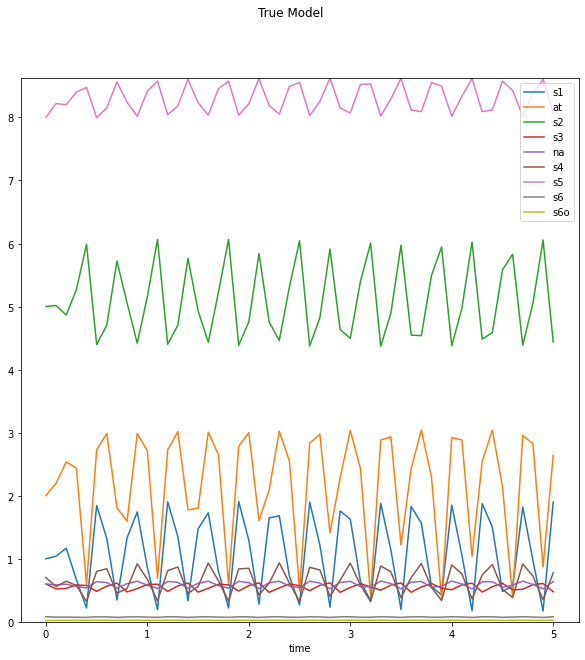

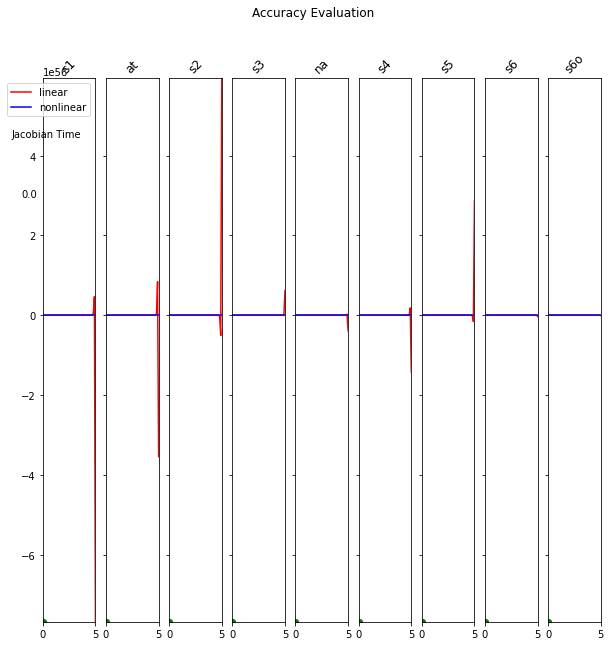

In [33]:
ctlsb = evaluateModel("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000206.2?filename=BIOMD0000000206_url.xml")

In [34]:
ctlsb.jacobian_df

,s1,at,s2,s3,na,s4,s5,s6,s6o
s1,-64.705882,89.445304,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
at,-129.411765,84.161402,0.0,168.741427,211.484241,153.769156,0.0,0.0,0.0
s2,64.705882,-89.445304,-9.8,0.000000,0.000000,0.000000,0.0,0.0,0.0
s3,0.000000,10.729206,19.6,-203.021427,-160.064241,6.230844,0.0,0.0,0.0
na,0.000000,10.729206,0.0,-134.461427,-422.904241,6.230844,0.0,800.0,0.0
s4,0.000000,45.270794,0.0,168.741427,211.484241,-166.230844,0.0,0.0,0.0
s5,0.000000,-56.000000,0.0,0.000000,0.000000,160.000000,-9.7,0.0,0.0
s6,0.000000,0.000000,0.0,0.000000,160.000000,0.000000,9.7,-1175.0,375.0
s6o,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,37.5,-117.5


# Model 193

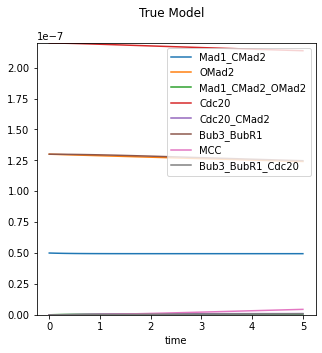

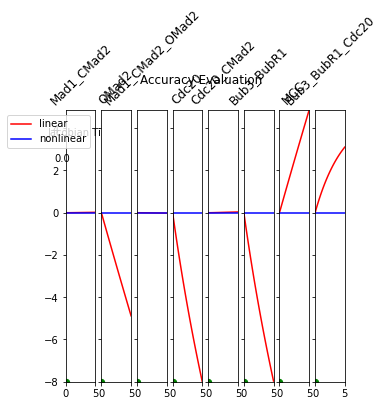

In [35]:
ctlsb = evaluateModel("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000193.2?filename=BIOMD0000000193_url.xml",
                     figsize=(5,5))

# Model 816

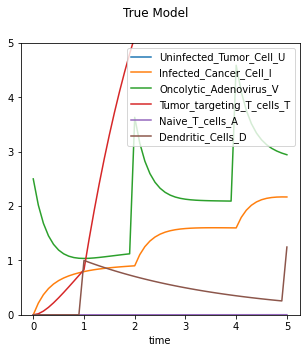

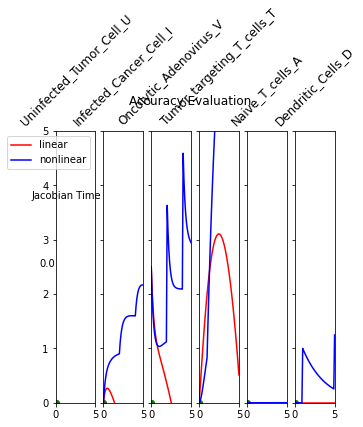

In [36]:
ctlsb = evaluateModel("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000816.5?filename=model.xml", 
                      ylim=[0, 5], figsize=(5,5))

# Model 823

Insulin levels impact outputs.

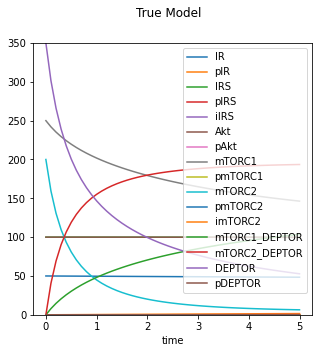

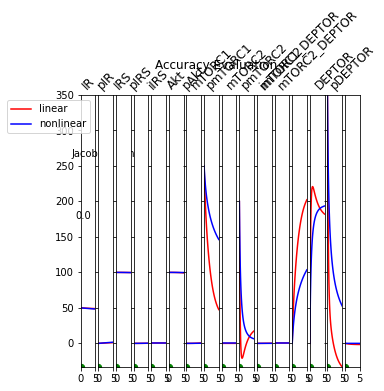

In [37]:
ctlsb_823 = evaluateModel("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000823.2?filename=Varusai2018.xml",
                       figsize=(5,5))

# Model 640

In [38]:
url_640 = "https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000640.2?filename=BIOMD0000000640_url.xml"

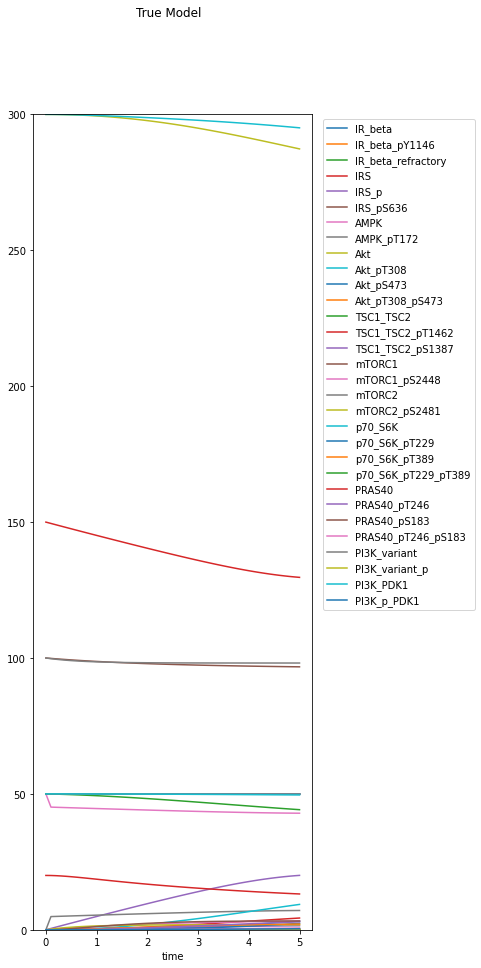

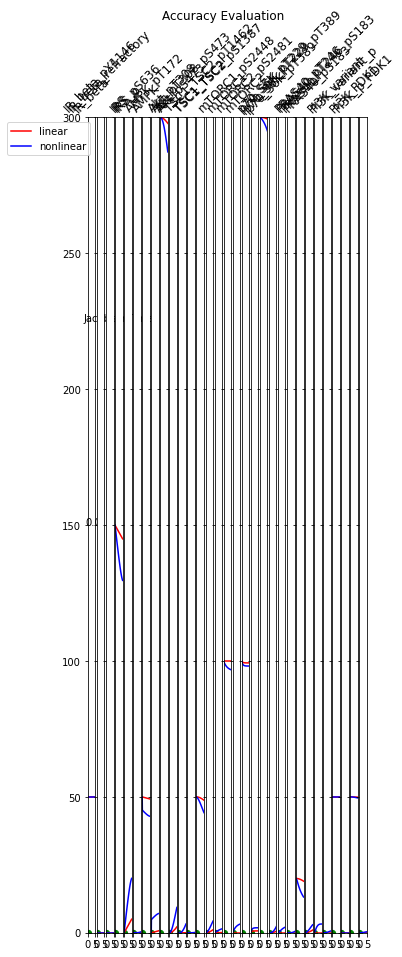

In [39]:
ctlsb = evaluateModel(url_640, figsize=(5,15), legend_crd=(1.6, 1))

In [40]:
symmath = SymmathSBML(url_640)

***Warning. Cannot process rule. Ignoring: piecewise(0, lt(time, 0), 0)
***Warning. Cannot process rule. Ignoring: piecewise(0, lt(time, 0), 1)


In [41]:
symmath.getSystem()

IR_beta                -0.0203796*IR_beta*Insulin + 323.611*IR_beta_r...
IR_beta_pY1146         0.0203796*IR_beta*Insulin - 0.493514*IR_beta_p...
IR_beta_refractory     0.493514*IR_beta_pY1146 - 323.611*IR_beta_refr...
IRS                    -0.0331672*Amino_Acids*IRS - 2.11894*IRS*IR_be...
IRS_p                  0.0331672*Amino_Acids*IRS + 2.11894*IRS*IR_bet...
IRS_pS636              0.0863775267376444*IRS*p70_S6K_pT229_pT389 + 0...
AMPK                   -17.6284*AMPK*Amino_Acids - 0.490602*AMPK*IRS_...
AMPK_pT172             17.6284*AMPK*Amino_Acids + 0.490602*AMPK*IRS_p...
Akt                    -7.47437*Akt*PI3K_p_PDK1 - 1.31992e-5*Akt*mTOR...
Akt_pT308              7.47437*Akt*PI3K_p_PDK1 - 0.159093*Akt_pT308*m...
Akt_pS473              1.31992e-5*Akt*mTORC2_pS2481 - 7.47345*Akt_pS4...
Akt_pT308_pS473        7.47345*Akt_pS473*PI3K_p_PDK1 + 0.159093*Akt_p...
TSC1_TSC2              -0.00175772*AMPK_pT172*TSC1_TSC2 - 1.52417*TSC...
TSC1_TSC2_pT1462       1.52417*TSC1_TSC2*(Akt_pT308

In [42]:
pd.set_option("max_colwidth", 300)
symmath.getJacobian()

,IR_beta,IR_beta_pY1146,IR_beta_refractory,IRS,IRS_p,IRS_pS636,AMPK,AMPK_pT172,Akt,Akt_pT308,...,p70_S6K_pT389,p70_S6K_pT229_pT389,PRAS40,PRAS40_pT246,PRAS40_pS183,PRAS40_pT246_pS183,PI3K_variant,PI3K_variant_p,PI3K_PDK1,PI3K_p_PDK1
IR_beta,-0.0203796*Insulin,0,323.611000000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IR_beta_pY1146,0.0203796*Insulin,-0.493514000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IR_beta_refractory,0,0.493514000000000,-323.611000000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IRS,0,-2.11894*IRS,0,-0.0331672*Amino_Acids - 2.11894*IR_beta_pY1146 - 0.0863775267376444*p70_S6K_pT229_pT389,0,25.0000000000000,0,0,0,0,...,0,-0.0863775267376444*IRS,0,0,0,0,0,0,0,0
IRS_p,0,2.11894*IRS,0,0.0331672*Amino_Acids + 2.11894*IR_beta_pY1146,-0.338859859949792*p70_S6K_pT229_pT389,0,0,0,0,0,...,0,-0.338859859949792*IRS_p,0,0,0,0,0,0,0,0
IRS_pS636,0,0,0,0.0863775267376444*p70_S6K_pT229_pT389,0.338859859949792*p70_S6K_pT229_pT389,-25.0000000000000,0,0,0,0,...,0,0.0863775267376444*IRS + 0.338859859949792*IRS_p,0,0,0,0,0,0,0,0
AMPK,0,0,0,0,-0.490602*AMPK,0,-17.6284*Amino_Acids - 0.490602*IRS_p,165.704000000000,0,0,...,0,0,0,0,0,0,0,0,0,0
AMPK_pT172,0,0,0,0,0.490602*AMPK,0,17.6284*Amino_Acids + 0.490602*IRS_p,-165.704000000000,0,0,...,0,0,0,0,0,0,0,0,0,0
Akt,0,0,0,0,0,0,0,0,-7.47437*PI3K_p_PDK1 - 1.31992e-5*mTORC2_pS2481,88.9654000000000,...,0,0,0,0,0,0,0,0,0,-7.47437*Akt
Akt_pT308,0,0,0,0,0,0,0,0,7.47437*PI3K_p_PDK1,-0.159093*mTORC2_pS2481 - 88.9654,...,0,0,0,0,0,0,0,0,0,7.47437*Akt


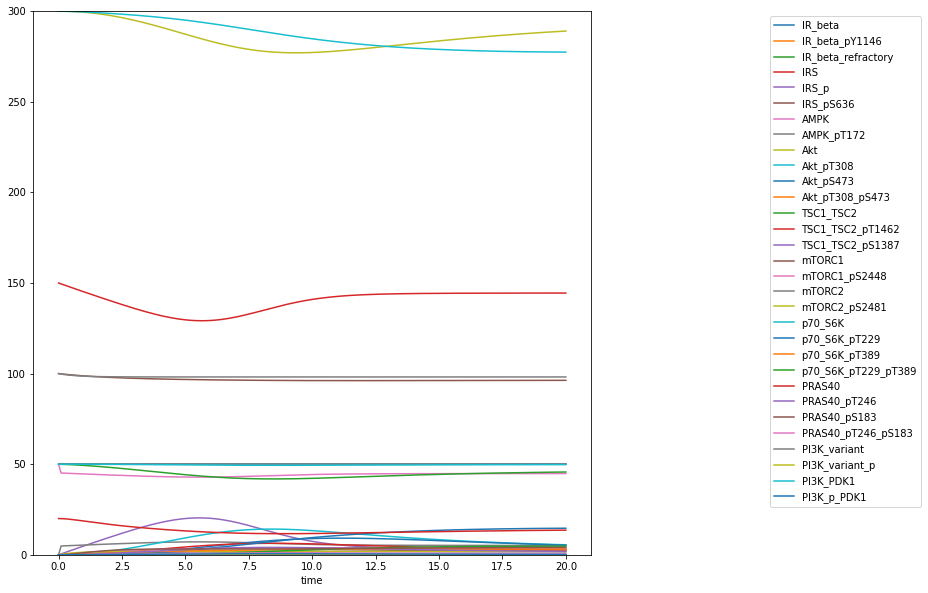

In [43]:
def runModel(url, legend_crd=(1.6, 1), is_plot=True, is_accuracy=True, **kwargs):
    ctlsb = ControlSBML(url)
    ctlsb.plotTrueModel(legend_crd=legend_crd, is_plot=is_plot, **kwargs)
    if is_accuracy:
        evaluateAccuracy(ctlsb.roadrunner, [1, 2, 4, 5], end_time=5, is_plot=is_plot)
    return ctlsb
    
# Tests
ctlsb_640a = runModel(url_640, is_plot=False, is_accuracy=False, end_time=20)